### Symmetric eigendecomposition 🌟

**Theorem.** Every real symmetric matrix $A$ is diagonalizable by an *orthogonal* matrix $Q$. It means that $A$ can be factorized as:
$$ A=QDQ^{-1}=QDQ^T $$
$$\begin{aligned}&=\quad\begin{bmatrix}q_1&q_2&\cdots&q_n\end{bmatrix}\begin{bmatrix}\lambda_1&0&\cdots&0\\0&\lambda_2&\cdots&0\\\vdots&\vdots&\ddots&\vdots\\0&0&\cdots&\lambda_n\end{bmatrix}\begin{bmatrix}q_1^T\\q_2^T\\\vdots\\q_n^T\end{bmatrix}\\&=\quad\sum_{i=1}^n\lambda_iq_iq_i^T\end{aligned}$$
- **The column vectors of $𝑄$ are $𝑛$ eigenvectors:**

### Symmetric eigendecomposition with change of variables

**Theorem.** Every real symmetric matrix $A$ is diagonalizable by an orthogonal matrix $Q$.

It means that $A$ can be factorized as: $A=QDQ^{-1}=QDQ^T$.

Let's apply the change of variables. Let $x=Qy$ and $y=Q^T x$. Then,
$$x^TAx=(P\mathbf{y})^\top A(Q\mathbf{y})=\mathbf{y}^\top Q^\top AQ\mathbf{y}=\mathbf{y}^\top(Q^\top AQ)\mathbf{y}=\mathbf{y}^\top D\mathbf{y}$$
It means that
$$\mathbf{x}^TA\mathbf{x}=\mathbf{y}^TD\mathbf{y}=[\begin{array}{cccc}y_1&y_2&\cdots&y_n\end{array}]\begin{bmatrix}\lambda_1&0&\cdots&0\\0&\lambda_2&\cdots&0\\\vdots&\vdots&\ddots&\vdots\\0&0&\cdots&\lambda_n\end{bmatrix}\begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix}$$
$$=\lambda_1y_1^2+\lambda_2y_2^2+\cdots+\lambda_ny_n^2$$


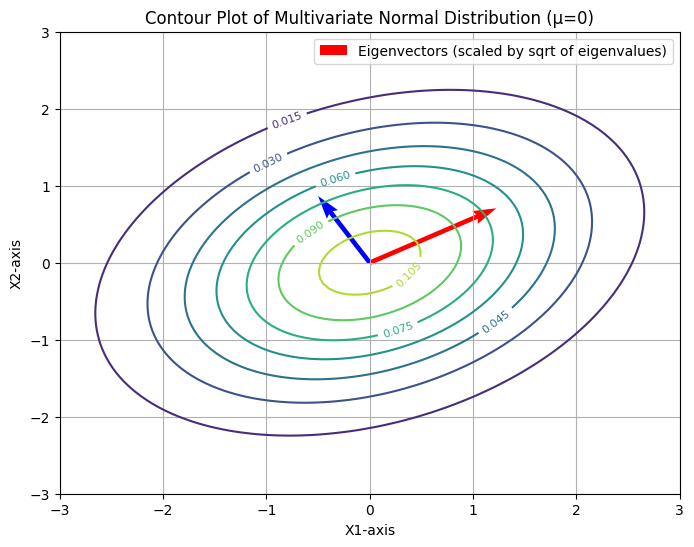

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters
mu = np.array([0, 0])  # Mean vector set to 0
Sigma = np.array([[7/4, np.sqrt(3)/4],
    [np.sqrt(3)/4, 5/4]]) 

eigenvalues, eigenvectors = np.linalg.eig(Sigma)
scaled_eigenvectors = eigenvectors * np.sqrt(eigenvalues)

# Create a grid for plotting
x1, x2 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
pos = np.dstack((x1, x2))

# Define the multivariate normal distribution
rv = multivariate_normal(mean=mu, cov=Sigma)
z = rv.pdf(pos)

# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(x1, x2, z, levels=10, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Plot scaled eigenvectors
origin = np.array([[0, 0], [0, 0]])  # Origin for the eigenvectors
plt.quiver(*origin, scaled_eigenvectors[0, :], 
scaled_eigenvectors[1, :],
color=['r', 'b'], angles='xy', 
scale_units='xy', scale=1,
label='Eigenvectors (scaled by sqrt of eigenvalues)')

plt.title('Contour Plot of Multivariate Normal Distribution (μ=0)')
plt.xlabel('X1-axis'); plt.ylabel('X2-axis')
plt.grid(); plt.legend(); plt.show()

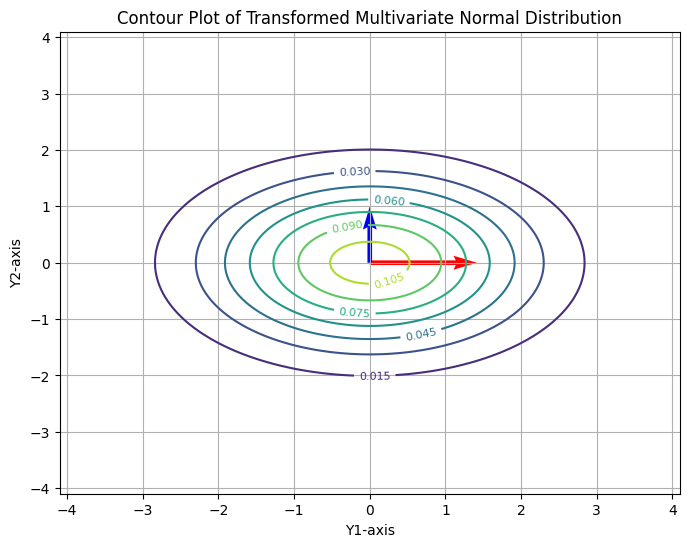

In [2]:
eigenvalues, eigenvectors = np.linalg.eig(Sigma)
Q = eigenvectors  # Orthogonal matrix of eigenvectors

# Transform grid points using y = Q^T x
pos_transformed = np.einsum('ij,...j->...i', Q.T, pos)

# Compute PDF in transformed coordinates
z_transformed = rv.pdf(np.einsum('ij,...j->...i', Q, pos_transformed))

# Plot contour lines in transformed coordinates
plt.figure(figsize=(8, 6))
contour = plt.contour(pos_transformed[..., 0], pos_transformed[..., 1], z, levels=10, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of Transformed Multivariate Normal Distribution')
plt.xlabel('Y1-axis')
plt.ylabel('Y2-axis')
plt.grid()
# Plot eigenvectors in transformed coordinates
origin = np.array([[0, 0], [0, 0]])  # Origin for the eigenvectors
scaled_eigenvectors = eigenvectors * np.sqrt(eigenvalues)  # Scale eigenvectors by sqrt of eigenvalues
transformed_eigenvectors = np.dot(Q.T, scaled_eigenvectors)  # Transform eigenvectors
plt.quiver(*origin, transformed_eigenvectors[0, :], transformed_eigenvectors[1, :],
           color=['r', 'b'], angles='xy', scale_units='xy', scale=1,
           label='Eigenvectors (transformed)')
plt.show()



### Document analysis with PCA for visualization

In [30]:
(eigvecs.T).shape, (data_matrix.T).shape

((2, 5), (6, 5))

data matrix:
                   Technology  Finance  Healthcare  Education  Environment  \
Tech News                   5        0           1          0            2   
Market Report               0        4           0          2            1   
Health Journal              1        0           5          1            0   
Education Blog              0        2           1          4            0   
Sports Highlights           2        1           0          0            3   

                   Sports  
Tech News               0  
Market Report           1  
Health Journal          0  
Education Blog          1  
Sports Highlights       5  
eigvals: [6.82264611 6.11095615 2.25145779 0.69283778 0.05543551]


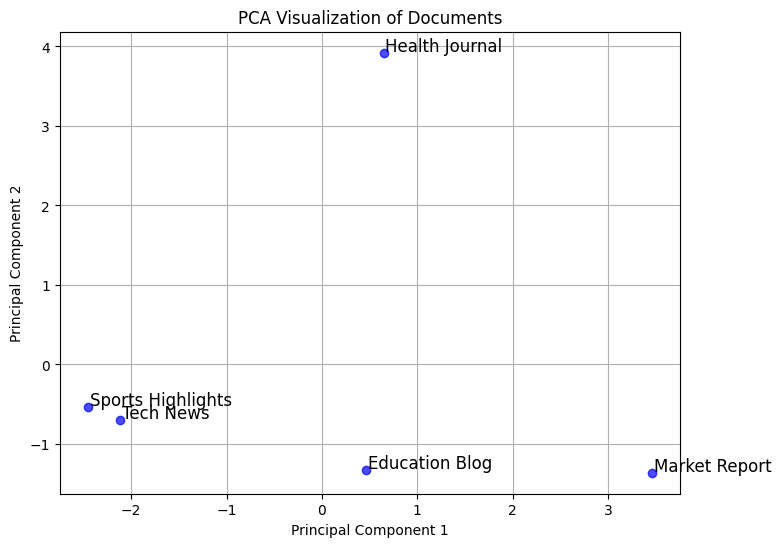

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define general terms (topics) and documents (contexts)
terms = ['Technology', 'Finance', 'Healthcare', 'Education', 'Environment', 'Sports']
documents = ['Tech News', 'Market Report', 'Health Journal', 'Education Blog', 'Sports Highlights']

# Step 2: Generate a term-document frequency matrix
frequencies = np.array([
    [5, 0, 1, 0, 2],  # Technology
    [0, 4, 0, 2, 1],  # Finance
    [1, 0, 5, 1, 0],  # Healthcare
    [0, 2, 1, 4, 0],  # Education
    [2, 1, 0, 0, 3],  # Environment
    [0, 1, 0, 1, 5]   # Sports
])

# Convert to a DataFrame for better readability
term_document_df = pd.DataFrame(frequencies, index=terms, columns=documents)
data_matrix = term_document_df.T

print("data matrix:", data_matrix)
eigvals, eigvecs = np.linalg.eig(np.cov(data_matrix))

eigvecs = eigvecs[:, np.argsort(eigvals)[::-1]]  # Sort eigenvectors by descending eigenvalues
eigvals = eigvals[np.argsort(eigvals)[::-1]]  # Sort eigenvalues by descending order

# Step 4: Apply PCA for dimensionality reduction
print("eigvals:", eigvals)
eigvecs = eigvecs[:, :2]  # Retain the first two eigenvectors
reeduced_data = eigvecs.T @ data_matrix

# Step 5: Visualize the results using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color='blue', alpha=0.7)

# Annotate points with document labels
for i, doc in enumerate(documents):
    plt.text(reduced_data[i, 0] + 0.02, reduced_data[i, 1] + 0.02, doc, fontsize=12)

plt.title('PCA Visualization of Documents')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
